
# Árboles de decisión para predecir el precio de casas — Ames Housing

Objetivo: predecir `SalePrice` (precio de venta) a partir de variables estructurales y de calidad.



## Introducción

Usaremos un **árbol de decisión** de regresión que imita un razonamiento jerárquico mediante reglas del tipo **si… entonces…**.  
**Objetivo**: crear un arbol de decisión y entender cómo **aprende** reglas, cómo **interpretarlas** y **qué tan bien** predice.



## El dataset: *Ames Housing*

Conjunto real (Dean De Cock, Iowa State University, 2006–2010).  
Para esta introducción usaremos **6 variables numéricas** + `SalePrice`:

| Variable      | Significado                                | Tipo                |
|---------------|---------------------------------------------|---------------------|
| `GrLivArea`   | Área habitable (ft²)                        | Numérica continua   |
| `OverallQual` | Calidad general (1–10)                      | Numérica ordinal    |
| `GarageCars`  | Capacidad del garaje (nº autos)             | Numérica discreta   |
| `FullBath`    | Baños completos                             | Numérica discreta   |
| `YearBuilt`   | Año de construcción                          | Numérica discreta   |
| `LotArea`     | Tamaño del terreno                           | Numérica continua   |
| `SalePrice`   | **Objetivo**: precio de venta               | Numérica continua   |



## Cargar y preparar los datos (OpenML)


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

sns.set()

ames = fetch_openml(name="house_prices", as_frame=True)
df = ames.frame.copy()



In [7]:
cols = ["GrLivArea","OverallQual", "GarageCars", "FullBath", "YearBuilt", "LotArea", "SalePrice"]
df = df[cols].dropna()

In [9]:
df.describe(include="all")

,GrLivArea,OverallQual,GarageCars,FullBath,YearBuilt,LotArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,6.099315,1.767123,1.565068,1971.267808,10516.828082,180921.195890
std,525.480383,1.382997,0.747315,0.550916,30.202904,9981.264932,79442.502883
min,334.000000,1.000000,0.000000,0.000000,1872.000000,1300.000000,34900.000000
25%,1129.500000,5.000000,1.000000,1.000000,1954.000000,7553.500000,129975.000000
50%,1464.000000,6.000000,2.000000,2.000000,1973.000000,9478.500000,163000.000000
75%,1776.750000,7.000000,2.000000,2.000000,2000.000000,11601.500000,214000.000000
max,5642.000000,10.000000,4.000000,3.000000,2010.000000,215245.000000,755000.000000



## Flujo de trabajo

| Paso | Qué hacemos | Qué aprendemos |
|---|---|---|
| 1️⃣ | **EDA** | Patrones y relaciones |
| 2️⃣ | **Split** | Generalización |
| 3️⃣ | **Entrenamiento** | Reglas jerárquicas |
| 4️⃣ | **Evaluación** | Calidad de predicción |
| 5️⃣ | **Interpretación** | Lectura del árbol e importancias |



## EDA
###  Distribución del precio


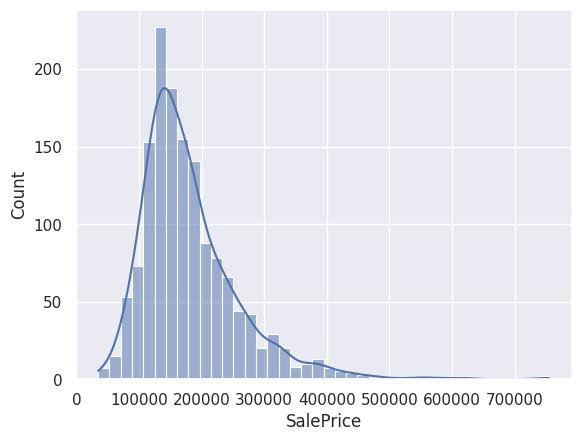

In [10]:
sns.histplot(df["SalePrice"], bins=40, kde=True)
plt.show()




### Superficie vs precio


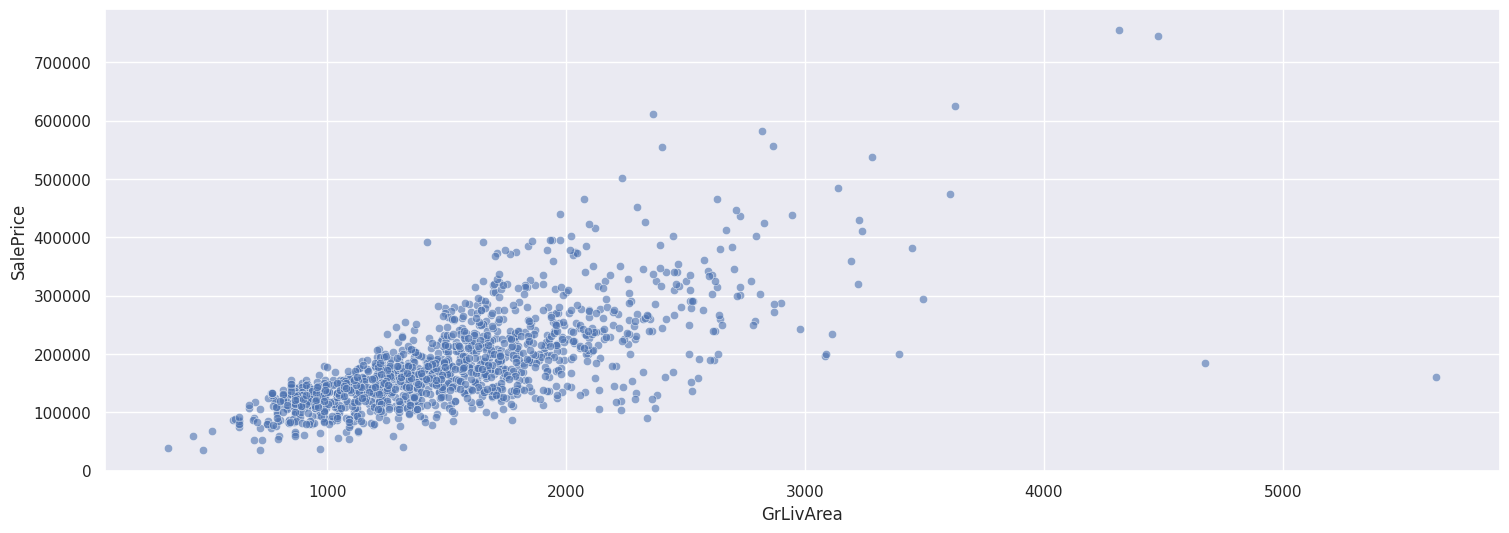

In [11]:
plt.figure(figsize=(18,6))
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", alpha=0.6)
plt.show()



### Calidad vs precio


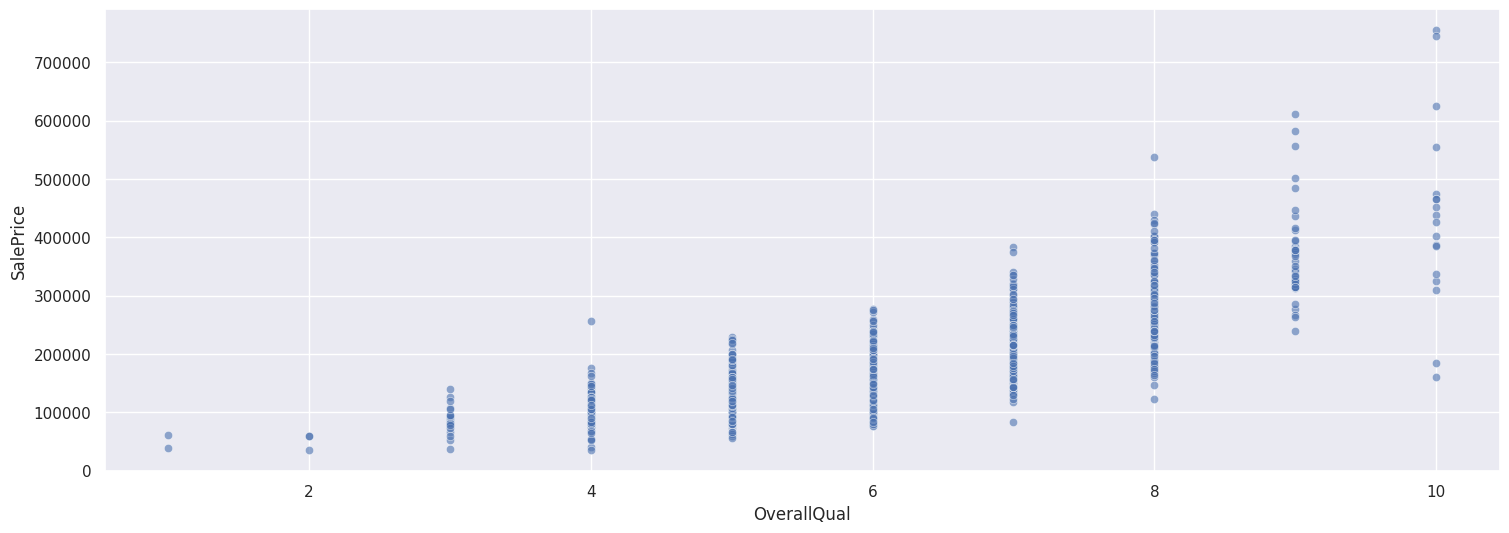

In [12]:
plt.figure(figsize=(18,6))
sns.scatterplot(data=df, x="OverallQual", y="SalePrice", alpha=0.6)
plt.show()



### Correlaciones con `SalePrice`


In [13]:
corr_to_target = df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)
corr_to_target


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
FullBath,0.560664
YearBuilt,0.522897
LotArea,0.263843



## División en entrenamiento y prueba


In [19]:
from sklearn.model_selection import train_test_split
X = df.drop(columns="SalePrice")
y=df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




## Entrenamiento del árbol (Regresión)


In [23]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=8, random_state=42)




In [25]:
tree.fit(X_train, y_train)
tree

DecisionTreeRegressor(max_depth=8, random_state=42)


## Evaluación


In [26]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = tree.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(r2)
print(mae)


0.8469212261193886
24147.359710804198



### Visualización del ajuste


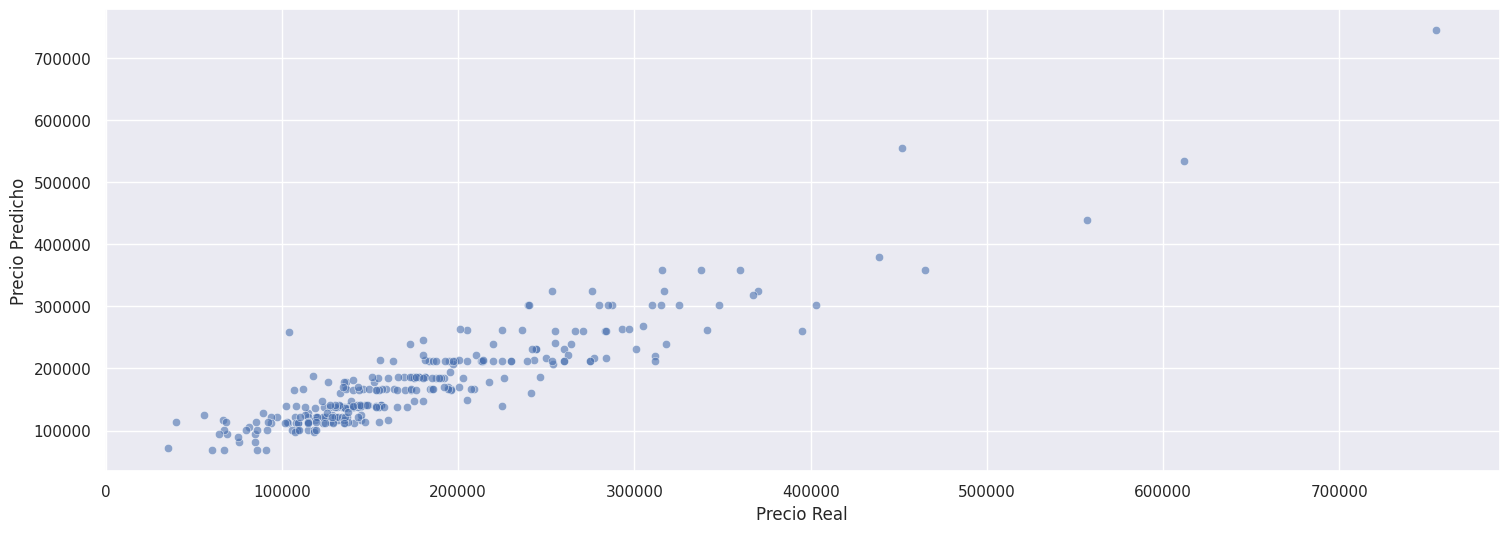

In [27]:
plt.figure(figsize=(18,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Precio Real"); plt.ylabel("Precio Predicho")
plt.show()



## Importancia de variables


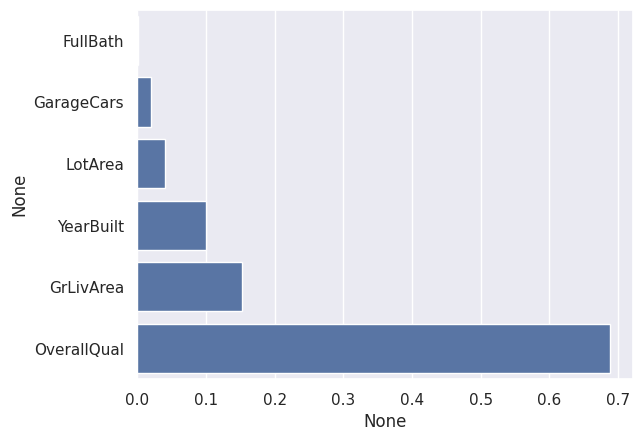

In [29]:
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=True)

sns.barplot(x=importances, y=importances.index)
plt.show()




## Visualización del árbol (primeros niveles)


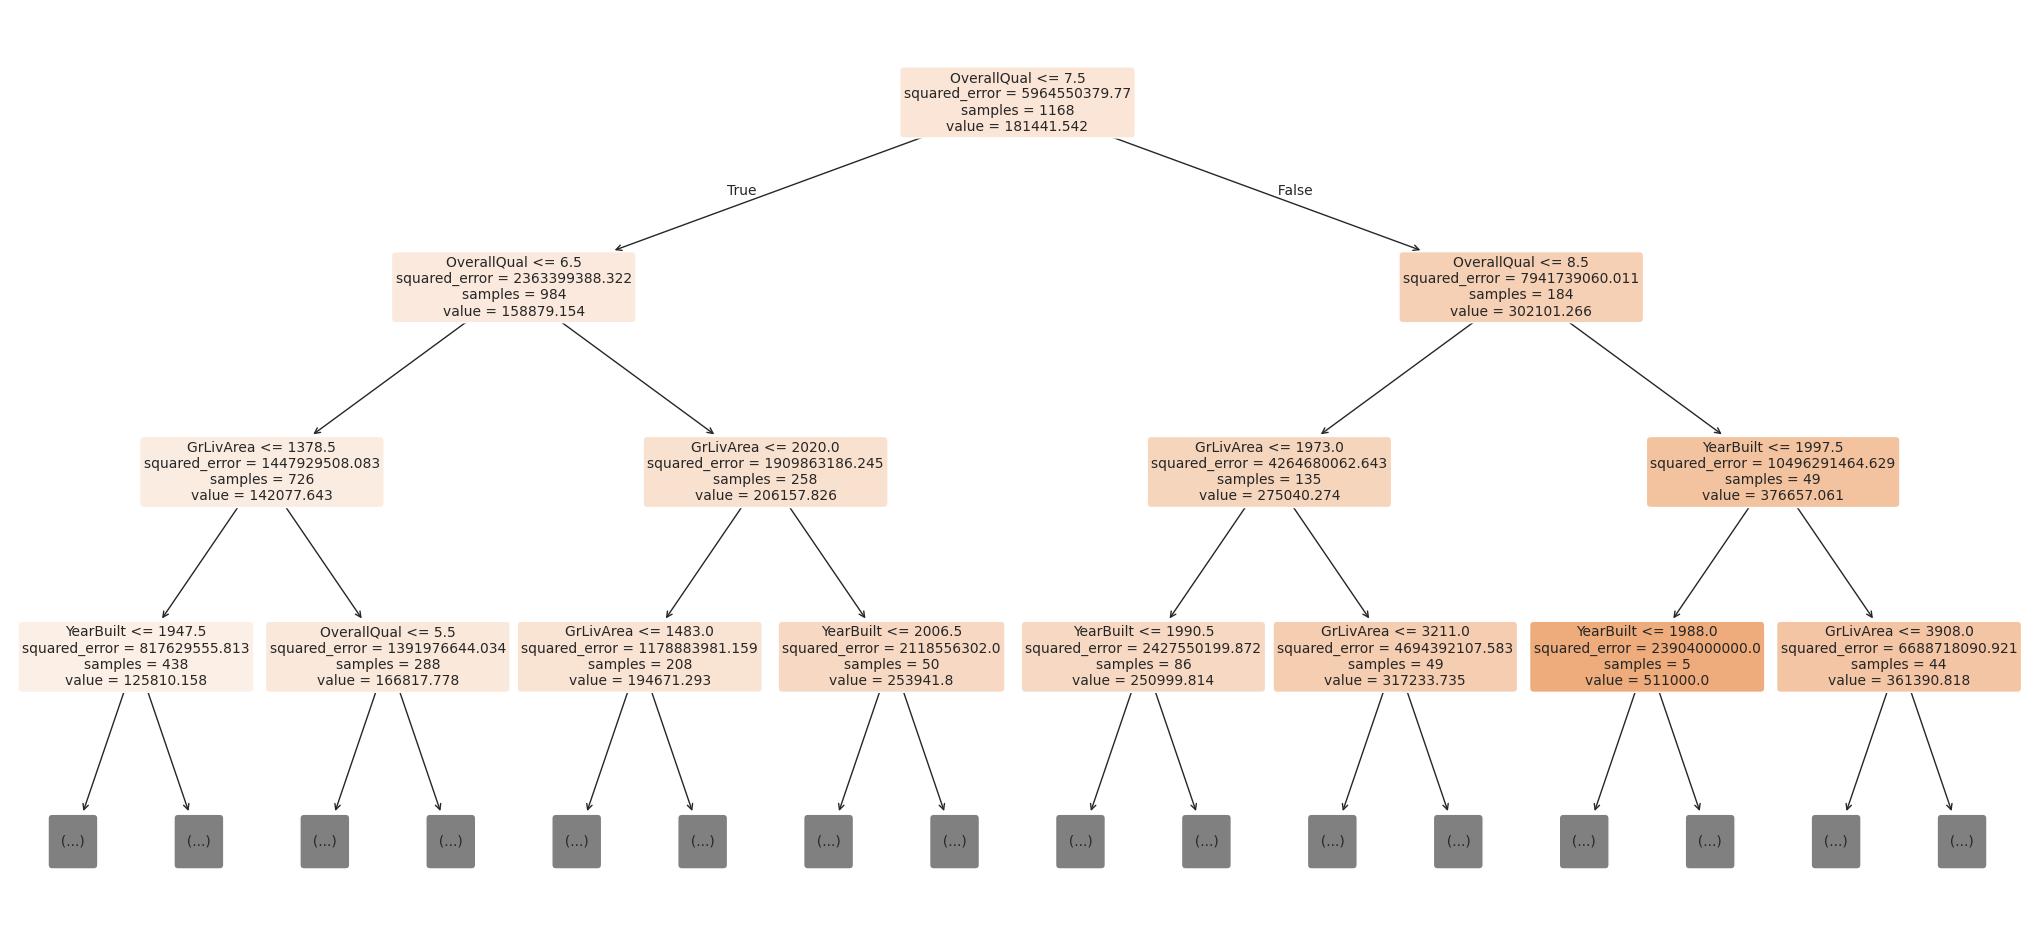

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(26,12))
plot_tree(
    tree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3
)
plt.show()




## Conclusiones

- El árbol divide jerárquicamente para reducir la **variabilidad** de `SalePrice` en cada grupo.
- Las hojas predicen el **promedio** del grupo.
- Modelo **interpretable** y base sólida para ensembles (RandomForest, Gradient Boosting).

**Siguientes pasos**: ajustar hiperparámetros con validación cruzada, probar `log(SalePrice)`, comparar con bosques/boosting.
